在对有限（非周期）离散的关联函数 进行傅立叶变换，就频谱的时候。
出现negative spectrum问题。



$$ 谱函数=\text{FFT}[关联函数] $$

$$ 绘图的亮度= \log( \text{abs}(谱函数) + 1 ) $$


我做了两件事情：（1)取绝对值；（2)加一再求对数。

其中第二个操作，是为了绘图时候，弱的激发不至于被强的激发掩盖。人的眼睛 耳朵，其实是log尺度的。



### 现在我的猜测，这个negative 问题，来源于非周期的截断。

在虚时间蒙特卡洛模拟里面，虚时间是周期性的。这个问题是没有的。

### 有没有自然的方法呢，这个问题提在了网站：

 https://math.stackexchange.com/questions/2817891/non-negative-fft-spectrum-density-in-numerics



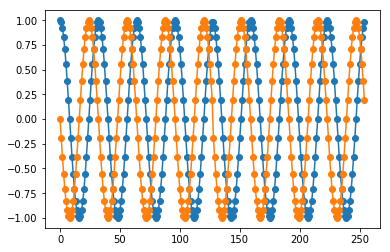

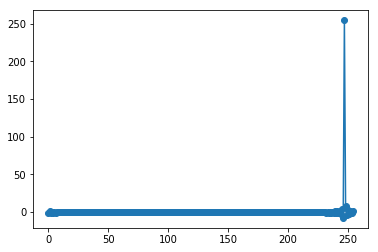

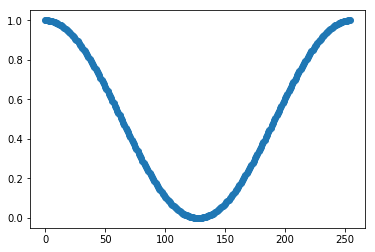

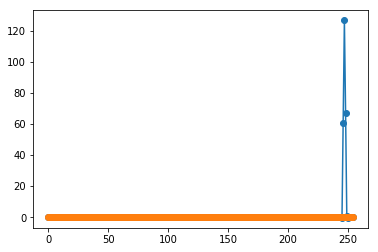

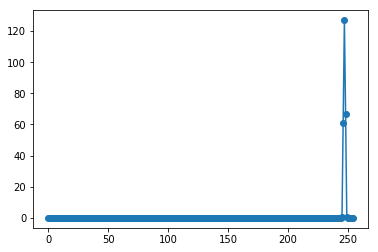

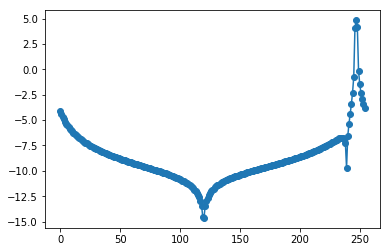

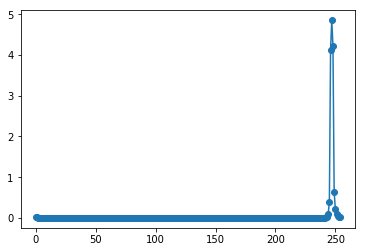

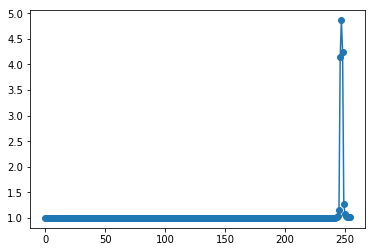

-0.47200603622


In [107]:
import numpy as np
import matplotlib.pyplot as plt

L=128
f=np.zeros((L,), dtype=np.complex)
for i in range(L):
    f[i]=np.exp(-1j*i*np.pi/16) 
f2=np.zeros((2*L-1,),dtype=np.complex)
f2[0:L]=f
f2[L:(2*L-1)]=np.conjugate(f[1:L][::-1])


plt.plot(np.real(f2),'o-')
plt.plot(np.imag(f2),'o-')

plt.show()

sp=np.fft.fft(f2)
plt.plot(np.real(sp),'o-')

plt.show()

h=np.hanning(2*L-1)
hrolled=np.roll(h,L)
plt.plot(hrolled,'o-')
plt.show()

f2h=np.multiply(f2,hrolled)
sph=np.fft.fft(f2h)
plt.plot(np.real(sph),'o-')
plt.plot(np.imag(sph),'o-')
plt.show()

plt.plot(np.abs(sph),'o-')wang zhan
plt.show()
plt.plot(np.log(np.abs(sph)),'o-')
plt.show()
plt.plot(np.log(np.abs(sph)+1),'o-')
plt.show()
plt.plot(np.log(np.abs(sph)+2.71828),'o-')
plt.show()
print(np.min(np.real(sph)))

In [112]:
print(np.min(np.real(sp)))

-7.71507331908


In [94]:
L=128
f=np.zeros((L,), dtype=np.complex)
f[4]=1
p=np.fft.ifft(f)

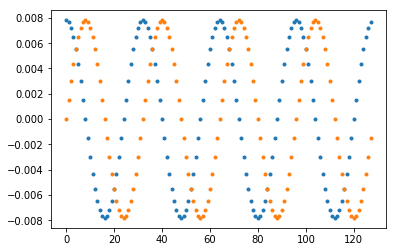

In [100]:
plt.plot(np.real(p),'.')
plt.plot(np.imag(p),'.')
plt.show()

In [104]:
p[L-1]

(0.0076623850031502386-0.0015241431407509963j)

In [106]:
p[0]

(0.0078125+0j)

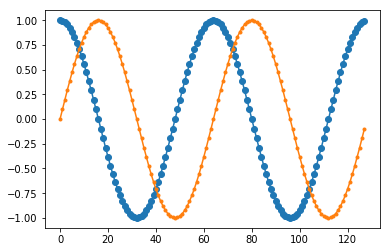

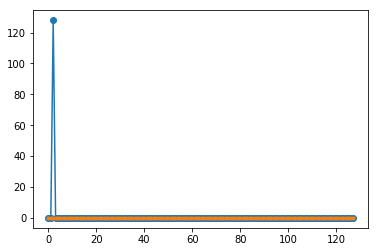

(-2.193547001033808e-14+9.2283907787077464e-15j)

In [124]:
L=128
f=np.zeros((L,), dtype=np.complex)
for i in range(L):
    f[i]=np.exp(1j*np.pi*i/32)
plt.plot(np.real(f),'o-')
plt.plot(np.imag(f),'.-')
plt.show()
p=np.fft.fft(f)
plt.plot(np.real(p),'o-')
plt.plot(np.imag(p),'.')
plt.show()
np.min(p)

## 周期扩充的尝试
$ x(t) $ 的关联函数是 $C(t)$

如果知道 $x(t)$ 求它的FFT，然后再绝对值平方，一定得到非负的谱。

即便　$x(t)$ 是有限的，是离散的，都没有问题；因为，有限的自己就定义好了自己的周期。

但是 $C(t)$ 不一样，它自己不能定义好一个自恰的周期。

一个想法就是把　$C(t)$扩充二倍

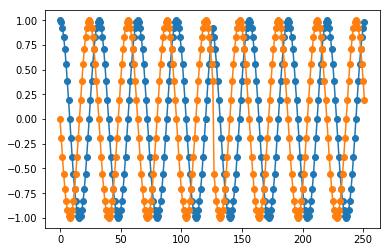

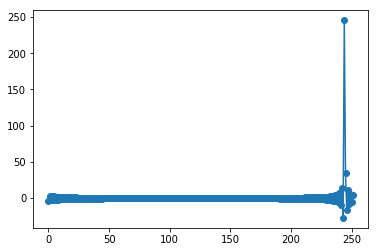

(-27.284080971-0.382683432365j)


In [149]:
import numpy as np
import matplotlib.pyplot as plt

L=127
f=np.zeros((L,), dtype=np.complex)
for i in range(L):
    f[i]=np.exp(-1j*i*np.pi/16) 
f2=np.zeros((2*L-2,),dtype=np.complex)
f2[0:L]=f
f2[L:(2*L-2)]=np.conjugate(f[1:L-1][::-1])

windowFunction=np.roll(np.hanning(L*2+1),L+1)



plt.plot(np.real(f2),'o-')
plt.plot(np.imag(f2),'o-')

plt.show()

sp=np.fft.fft(f2)
plt.plot(np.real(sp),'o-')

plt.show()
print(np.min(sp))

0.0
0.0


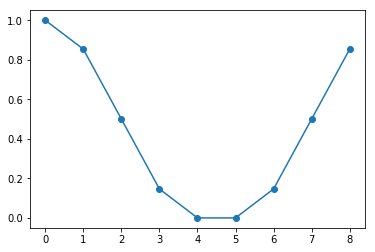

In [147]:
L=4
hw=np.roll(np.hanning(L*2+1),L+1)
np.min(hw)
plt.plot(hw,'o-')
print(hw[4])
print(hw[5])

# 对称　周期化

0.0
1.0
0.0
0.999903620241


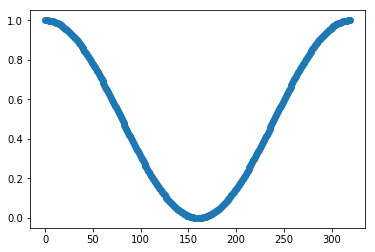

In [164]:
L=160
win1=np.zeros(2*L)
for i in range(2*L):
    win1[i]=np.cos(np.pi*i/L)*0.5+0.5
print(np.min(win1))
print(win1[0])
print(win1[L])
print(win1[2*L-1])
plt.plot(win1,'o-')

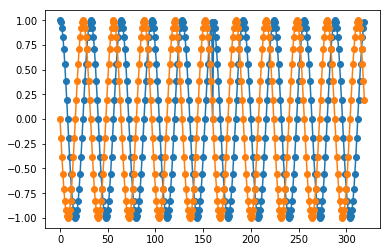

In [165]:
f=np.zeros((L,), dtype=np.complex)
for i in range(L):
    f[i]=np.exp(-1j*i*np.pi/16) 
f2=np.zeros((2*L,),dtype=np.complex)
f2[0:L]=f
f2[L]=0
f2[L+1:(2*L)]=np.conjugate(f[1:L][::-1])


plt.plot(np.real(f2),'o-')
plt.plot(np.imag(f2),'o-')

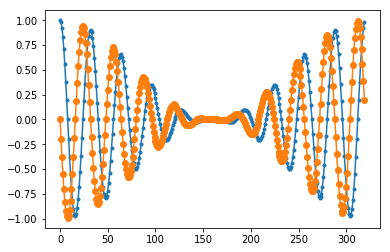

In [166]:
f2_win1=np.multiply(f2,win1)
plt.plot(np.real(f2_win1),'.-')
plt.plot(np.imag(f2_win1),'o-')

-5.68434188608e-14
-3.13722289632e-13


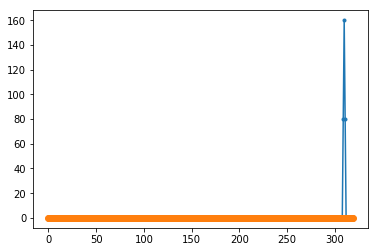

In [167]:
f2_win1_fft=np.fft.fft(f2_win1)

plt.plot(np.real(f2_win1_fft),'.-')
plt.plot(np.imag(f2_win1_fft),'o-')
print(np.min(np.real(f2_win1_fft)))
print(np.min(np.imag(f2_win1_fft)))

# 对称　周期化 (合集)

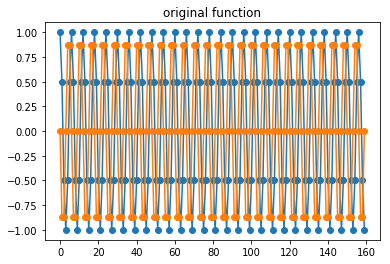

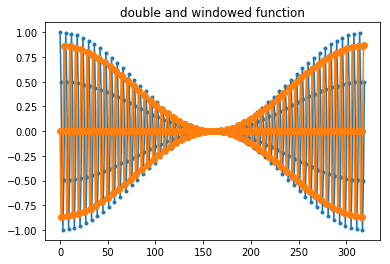

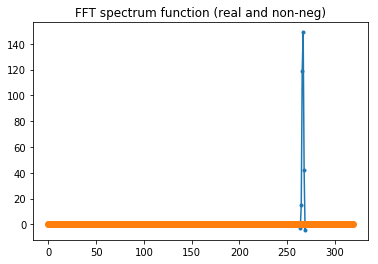

-4.25310855808
-2.62725168952e-13


In [188]:
L=160
win1=np.zeros(2*L)
for i in range(2*L):
    win1[i]=np.cos(np.pi*i/L)*0.5+0.5

#plt.plot(win1,'o-')
#plt.show()


f=np.zeros((L,), dtype=np.complex)
for i in range(L):
    f[i]= np.exp(-1j*i*np.pi/3-i*np.pi*0/1000)
f2=np.zeros((2*L,),dtype=np.complex)
f2[0:L]=f
f2[L]=0
f2[L+1:(2*L)]=np.conjugate(f[1:L][::-1])


plt.plot(np.real(f),'o-')
plt.plot(np.imag(f),'o-')
plt.title("original function")
plt.show()

f2_win1=np.multiply(f2,win1)
plt.plot(np.real(f2_win1),'.-')
plt.plot(np.imag(f2_win1),'o-')
plt.title("double and windowed function")
plt.show()


f2_win1_fft=np.fft.fft(f2_win1)

plt.plot(np.real(f2_win1_fft),'.-')
plt.plot(np.imag(f2_win1_fft),'o-')
plt.title("FFT spectrum function (real and non-neg)")

plt.show()

print(np.min(np.real(f2_win1_fft)))
print(np.min(np.imag(f2_win1_fft)))

# 使用指数衰减函数作为窗

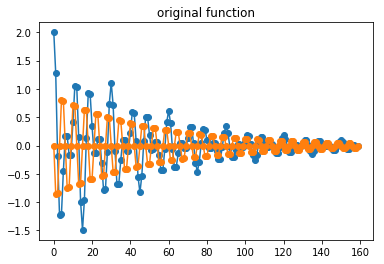

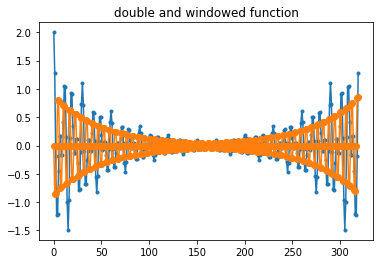

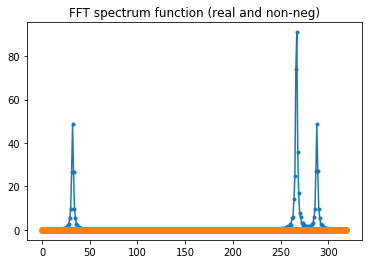

0.00332250387785
-1.54389935332e-13


In [197]:
L=160
win1=np.zeros(2*L)
for i in range(2*L):
    win1[i]=1 #np.cos(np.pi*i/L)*0.5+0.5

#plt.plot(win1,'o-')
#plt.show()


f=np.zeros((L,), dtype=np.complex)
for i in range(L):
    f[i]= (np.exp(-1j*i*np.pi/3)+np.cos(i*np.pi/5))*np.exp(-i*np.pi/L)
f2=np.zeros((2*L,),dtype=np.complex)
f2[0:L]=f
f2[L]=0
f2[L+1:(2*L)]=np.conjugate(f[1:L][::-1])


plt.plot(np.real(f),'o-')
plt.plot(np.imag(f),'o-')
plt.title("original function")
plt.show()

f2_win1=np.multiply(f2,win1)
plt.plot(np.real(f2_win1),'.-')
plt.plot(np.imag(f2_win1),'o-')
plt.title("double and windowed function")
plt.show()


f2_win1_fft=np.fft.fft(f2_win1)

plt.plot(np.real(f2_win1_fft),'.-')
plt.plot(np.imag(f2_win1_fft),'o-')
plt.title("FFT spectrum function (real and non-neg)")

plt.show()

print(np.min(np.real(f2_win1_fft)))
print(np.min(np.imag(f2_win1_fft)))

In [200]:
np.e**-np.pi

0.043213918263772265

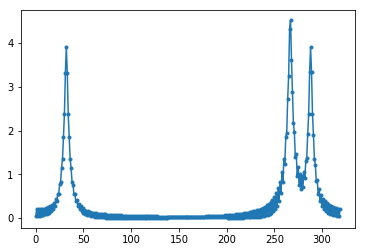

In [208]:
plt.plot(np.log(np.real(f2_win1_fft)+1),'.-')
plt.show()